# User input

In [1]:
start_year_past = 2021
stop_year_past = 2040
start_year_future = 2041
stop_year_future = 2060

# Import package

In [2]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
import math

from Functions_Indicators_precipitation import changes_in_indicators

# Import data

In [3]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6'
csv_path = os.path.join(out_path,'csv_file','pr_day_2021-2060','All_projects_moz_precipitation_2021-2060_without_month_year.csv')
precipitation_2021_2060 = pd.read_csv(csv_path,header=[0,1],index_col=[0,1,2,3,4])*86400 # units mm/day :  1 kg/m2/s = 86400 mm/day
# source: https://www.researchgate.net/post/How-do-I-convert-ERA-Interim-precipitation-estimates-from-kg-m2-s-to-mm-day
list_time_2021_2060=pd.date_range('01-01-2021','31-12-2060', freq='D').strftime('%d-%m-%Y').values.tolist()

In [4]:
precipitation_2021_2060_copy = precipitation_2021_2060.copy(deep=True) # make a coåy that can be modified without changin the original

In [5]:
precipitation_2021_2060_copy

Longitude  \
                                                                    33.625   
Name project          Experiment Model      Date       Latitude              
PT_Revubue_2_Rev_2_01 ssp245     ACCESS-CM2 01-01-2021 -16.125    5.057179   
                                            02-01-2021 -16.125   17.624178   
                                            03-01-2021 -16.125    7.632648   
                                            04-01-2021 -16.125    4.736492   
                                            05-01-2021 -16.125    4.981353   
...                                                                    ...   
PT__Dumping_Site      ssp370     TaiESM1    27-12-2060 -13.125         NaN   
                                            28-12-2060 -13.125         NaN   
                                            29-12-2060 -13.125         NaN   
                                            30-12-2060 -13.125         NaN   
                                            31-12-2060 -13.125         NaN   

                                                                               \
                                                                39.875 36.875   
Name project          Experiment Model      Date       Latitude                 
PT_Revubue_2_Rev_2_01 ssp245     ACCESS-CM2 01-01-2021 -16.125     NaN    NaN   
                                            02-01-2021 -16.125     NaN    NaN   
                                            03-01-2021 -16.125     NaN    NaN   
                                            04-01-2021 -16.125     NaN    NaN   
                                            05-01-2021 -16.125     NaN    NaN   
...                                                                ...    ...   
PT__Dumping_Site      ssp370     TaiESM1    27-12-2060 -13.125     NaN    NaN   
                                            28-12-2060 -13.125     NaN    NaN   
                                            29-12-2060 -13.125     NaN    NaN   
                                            30-12-2060 -13.125     NaN    NaN   
                                            31-12-2060 -13.125     NaN    NaN   

                                                                           
                                                                   40.375  
Name project          Experiment Model      Date       Latitude            
PT_Revubue_2_Rev_2_01 ssp245     ACCESS-CM2 01-01-2021 -16.125        NaN  
                                            02-01-2021 -16.125        NaN  
                                            03-01-2021 -16.125        NaN  
                                            04-01-2021 -16.125        NaN  
                                            05-01-2021 -16.125        NaN  
...                                                                   ...  
PT__Dumping_Site      ssp370     TaiESM1    27-12-2060 -13.125   0.000000  
                                            28-12-2060 -13.125   0.435942  
                                            29-12-2060 -13.125   6.300328  
                                            30-12-2060 -13.125   8.168522  
                                            31-12-2060 -13.125   0.737792  

[6136200 rows x 4 columns]

In [6]:
# delete model 'NESM3' that does not have any value
try:
    precipitation_2021_2060_copy = precipitation_2021_2060.copy(deep=True)
    precipitation_2021_2060_copy.drop('NESM3', level=2, axis=0, inplace=True)
    precipitation_2021_2060_copy.loc[(precipitation_2021_2060_copy.index.levels[0][0],precipitation_2021_2060_copy.index.levels[1][0],'NESM3')]
except KeyError:
    print('KeyError')

KeyError


C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_517472\3815715974.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  precipitation_2021_2060_copy.loc[(precipitation_2021_2060_copy.index.levels[0][0],precipitation_2021_2060_copy.index.levels[1][0],'NESM3')]


In [7]:
# treatment of dataframe to make useable
df_years=precipitation_2021_2060_copy.copy(deep=True)
#df_year = df_year1.loc[('PT_Revubue_2_Rev_2_01')] # select one project
df_years.columns = df_years.columns.droplevel(0) # drop first level of column name
df_years['33.625'] = df_years['33.625'].fillna(0)
df_years['39.875'] = df_years['39.875'].fillna(0)
df_years['36.875'] = df_years['36.875'].fillna(0)
df_years['40.375'] = df_years['40.375'].fillna(0)
df_years['33.625'] = df_years['33.625'] + df_years['39.875'] + df_years['36.875'] + df_years['40.375']
df_years = df_years[['33.625']]
df_years=df_years.rename(columns={df_years.columns[0]:'Precipitation mm/day period 2021-2060'})
df_years=df_years.droplevel(level=4) # drop latitude index
df_years=df_years.reset_index()

Year = df_years[['Date']].values.reshape(len(df_years[['Date']].values),)
for i in np.arange(0,len(df_years[['Date']].values)):
    Year[i]=int(Year[i][6:10])

df_years['Year'] = Year
df_years

,Name project,Experiment,Model,Date,Precipitation mm/day period 2021-2060,Year
0,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,01-01-2021,5.057179,2021
1,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,02-01-2021,17.624178,2021
2,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,03-01-2021,7.632648,2021
3,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,04-01-2021,4.736492,2021
4,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,05-01-2021,4.981353,2021
...,...,...,...,...,...,...
5727115,PT__Dumping_Site,ssp370,TaiESM1,27-12-2060,0.000000,2060
5727116,PT__Dumping_Site,ssp370,TaiESM1,28-12-2060,0.435942,2060
5727117,PT__Dumping_Site,ssp370,TaiESM1,29-12-2060,6.300328,2060
5727118,PT__Dumping_Site,ssp370,TaiESM1,30-12-2060,8.168522,2060


In [8]:
# select past datas, between start_year_future and stop_year_future
df_past = df_years.loc[df_years['Year'].between(start_year_past,stop_year_past)]
df_past

,Name project,Experiment,Model,Date,Precipitation mm/day period 2021-2060,Year
0,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,01-01-2021,5.057179,2021
1,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,02-01-2021,17.624178,2021
2,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,03-01-2021,7.632648,2021
3,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,04-01-2021,4.736492,2021
4,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,05-01-2021,4.981353,2021
...,...,...,...,...,...,...
5719810,PT__Dumping_Site,ssp370,TaiESM1,27-12-2040,0.184525,2040
5719811,PT__Dumping_Site,ssp370,TaiESM1,28-12-2040,5.674063,2040
5719812,PT__Dumping_Site,ssp370,TaiESM1,29-12-2040,0.471744,2040
5719813,PT__Dumping_Site,ssp370,TaiESM1,30-12-2040,5.973260,2040


In [9]:
# select future data, between start_year_future and stop_year_future
df_future = df_years.loc[df_years['Year'].between(start_year_future,stop_year_future)]
df_future

,Name project,Experiment,Model,Date,Precipitation mm/day period 2021-2060,Year
7305,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,01-01-2041,12.308317,2041
7306,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,02-01-2041,8.492493,2041
7307,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,03-01-2041,10.244099,2041
7308,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,04-01-2041,30.440408,2041
7309,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,05-01-2041,23.266100,2041
...,...,...,...,...,...,...
5727115,PT__Dumping_Site,ssp370,TaiESM1,27-12-2060,0.000000,2060
5727116,PT__Dumping_Site,ssp370,TaiESM1,28-12-2060,0.435942,2060
5727117,PT__Dumping_Site,ssp370,TaiESM1,29-12-2060,6.300328,2060
5727118,PT__Dumping_Site,ssp370,TaiESM1,30-12-2060,8.168522,2060


## Average yearly precipitation

In [10]:
from Functions_Indicators_precipitation import yearly_avg_pr

In [11]:
# For historical period
title_column = 'Yearly average precipitation mm/year period '+str(start_year_past)+'-'+str(stop_year_past)
df_years_avg_past_distribution= yearly_avg_pr(df_past,title_column)

In [12]:
# For future period
title_column = 'Yearly average precipitation mm/year period '+str(start_year_future)+'-'+str(stop_year_future)
df_years_avg_future_distribution= yearly_avg_pr(df_future,title_column)

In [13]:
# Comparaison between past and future period

In [14]:
changes_past_future_indicator = pd.DataFrame()
changes_past_future_indicator1 = changes_in_indicators(df_years_avg_past_distribution,df_years_avg_future_distribution,'Average yearly precipitation','mm/year','Incremental rainfall change')
changes_past_future_indicator=pd.concat([changes_past_future_indicator,changes_past_future_indicator1])
changes_past_future_indicator

Incremental rainfall change  \
                                 Average yearly precipitation   
                           Median for the past period mm/year   
Chimoio_2ML_Reservoir                              959.495224   
Mugica_dam_road                                    997.084711   
PT1_Pemba__Breidge_Paquite                         919.957255   
PT_Nicoadala_F5                                   1281.556473   
PT_Revubue_2_Rev_2_01                              667.575050   
PT__Dumping_Site                                   908.580517   
WTP_gate_cnr1                                      667.575050   

                                                      \
                                                       
                           Change in the median in %   
Chimoio_2ML_Reservoir                      -2.202097   
Mugica_dam_road                            -3.949296   
PT1_Pemba__Breidge_Paquite                 -2.045428   
PT_Nicoadala_F5                            -3.107802   
PT_Revubue_2_Rev_2_01                       1.082005   
PT__Dumping_Site                           -2.344221   
WTP_gate_cnr1                               1.082005   

                                                                         \
                                                                          
                           10-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                        876.070059   
Mugica_dam_road                                              889.596413   
PT1_Pemba__Breidge_Paquite                                   808.663944   
PT_Nicoadala_F5                                             1189.149648   
PT_Revubue_2_Rev_2_01                                        618.127196   
PT__Dumping_Site                                             799.441283   
WTP_gate_cnr1                                                618.127196   

                                                         \
                                                          
                           Change in 10-th percentile %   
Chimoio_2ML_Reservoir                         -1.747428   
Mugica_dam_road                               -3.806494   
PT1_Pemba__Breidge_Paquite                    -1.154481   
PT_Nicoadala_F5                               -6.790416   
PT_Revubue_2_Rev_2_01                         -1.444476   
PT__Dumping_Site                              -1.188254   
WTP_gate_cnr1                                 -1.444476   

                                                                         \
                                                                          
                           90-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                       1046.813621   
Mugica_dam_road                                             1096.010448   
PT1_Pemba__Breidge_Paquite                                  1012.728088   
PT_Nicoadala_F5                                             1412.904063   
PT_Revubue_2_Rev_2_01                                        732.638722   
PT__Dumping_Site                                            1002.330456   
WTP_gate_cnr1                                                732.638722   

                                                         
                                                         
                           Change in 90-th percentile %  
Chimoio_2ML_Reservoir                          0.562997  
Mugica_dam_road                               -2.197210  
PT1_Pemba__Breidge_Paquite                    -2.357272  
PT_Nicoadala_F5                               -1.974410  
PT_Revubue_2_Rev_2_01                          0.881545  
PT__Dumping_Site                              -2.925441  
WTP_gate_cnr1                                  0.881545

In [58]:
df_past

,Name project,Experiment,Model,Date,Precipitation mm/day period 2021-2060,Year
0,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,01-01-2021,5.057179,2021
1,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,02-01-2021,17.624178,2021
2,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,03-01-2021,7.632648,2021
3,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,04-01-2021,4.736492,2021
4,PT_Revubue_2_Rev_2_01,ssp245,ACCESS-CM2,05-01-2021,4.981353,2021
...,...,...,...,...,...,...
5719810,PT__Dumping_Site,ssp370,TaiESM1,27-12-2040,0.184525,2040
5719811,PT__Dumping_Site,ssp370,TaiESM1,28-12-2040,5.674063,2040
5719812,PT__Dumping_Site,ssp370,TaiESM1,29-12-2040,0.471744,2040
5719813,PT__Dumping_Site,ssp370,TaiESM1,30-12-2040,5.973260,2040


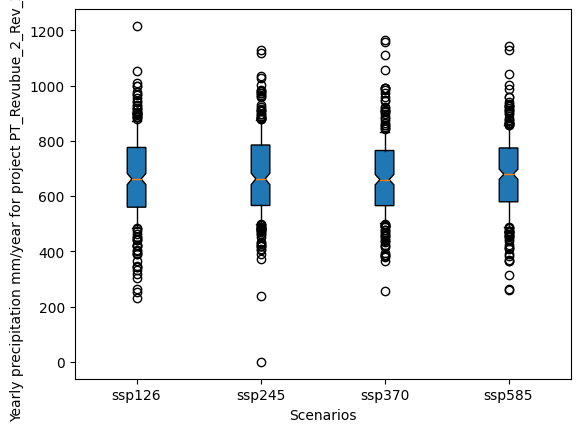

In [82]:
# boxplot

df_yearly_avg = df_past.copy(deep =True)
df_yearly_avg=df_yearly_avg.drop(labels='Date',axis=1)
df_yearly_avg=df_yearly_avg.rename(columns={df_yearly_avg.columns[3]:'Yearly precipitation mm/year'})
df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model','Year']).sum() # sum per year
#df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()

dict_boxplot = plt.boxplot([df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp245'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp245'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp370'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp370'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp585'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year']),)],notch=True, whis =(10,90),widths = 0.15, patch_artist=True,labels=df_yearly_avg.index.levels[1].tolist())
# ... present boxplot over the period for each models
# this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
# here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
# 'notch' is true to enhance part where the median is
# 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
# 'widths' determine width of the boxes
# 'patch_artist' colors the boxplots
# 'labels' gives a name to every column included in the data part

#str = 'Annual maximum precipitation mm/day\naccross different scenarios between 2030 and 2060'
#title_png = 'Annual maximum precipitation mm.day accross different scenarios between 2030 and 2060.png'
#plt.title(str)
plt.xlabel('Scenarios')
plt.ylabel('Yearly precipitation mm/year for project PT_Revubue_2_Rev_2_01')
#path_boxplot = os.path.join(path_figure,'Boxplots')
#if not os.path.isdir(path_boxplot):
#    os.makedirs(path_boxplot)
#plt.savefig(os.path.join(path_boxplot,title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
plt.show()

In [87]:
df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()
title_column = 'Yearly average precipitation mm/year'
df_yearly_avg=df_yearly_avg.rename(columns={df_yearly_avg.columns[0]:title_column})
df_yearly_avg

Yearly average precipitation mm/year
Name project          Experiment Model                                              
Chimoio_2ML_Reservoir ssp126     ACCESS-CM2                               915.694165
                                 ACCESS-ESM1-5                            941.803783
                                 BCC-CSM2-MR                              949.558937
                                 CMCC-CM2-SR5                            1005.862911
                                 CMCC-ESM2                               1041.000086
...                                                                              ...
WTP_gate_cnr1         ssp585     MPI-ESM1-2-LR                            634.809814
                                 MRI-ESM2-0                               629.812801
                                 NorESM2-LM                               630.305049
                                 NorESM2-MM                               701.689807
                                 TaiESM1                                  665.478532

[392 rows x 1 columns]

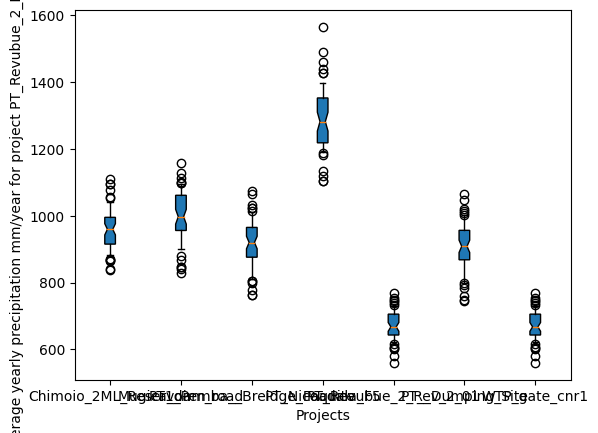

In [90]:
dict_boxplot = plt.boxplot([df_yearly_avg.loc[(df_yearly_avg.index.levels[0][0]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][0]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][1]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][1]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][2]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][2]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][3]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][3]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][4]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][4]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][5]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][5]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][6]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][6]),title_column]),)],notch=True, whis =(10,90),widths = 0.15, patch_artist=True,labels=df_yearly_avg.index.levels[0].tolist())
# ... present boxplot over the period for each models
# this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
# here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
# 'notch' is true to enhance part where the median is
# 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
# 'widths' determine width of the boxes
# 'patch_artist' colors the boxplots
# 'labels' gives a name to every column included in the data part

#str = 'Annual maximum precipitation mm/day\naccross different scenarios between 2030 and 2060'
#title_png = 'Annual maximum precipitation mm.day accross different scenarios between 2030 and 2060.png'
#plt.title(str)
plt.xlabel('Projects')
plt.ylabel('Average yearly precipitation mm/year for project PT_Revubue_2_Rev_2_01')
#path_boxplot = os.path.join(path_figure,'Boxplots')
#if not os.path.isdir(path_boxplot):
#    os.makedirs(path_boxplot)
#plt.savefig(os.path.join(path_boxplot,title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
plt.show()

## Seasonal average precipitation

In [15]:
from Functions_Indicators_precipitation import avg_dry_season_precipitation

In mozambique, dry season from April to september. Humid season from October to March

In [16]:
# historic

In [17]:
title_column1 = 'Yearly average precipitation mm/season per year for the period '+str(start_year_past)+'-'+str(stop_year_past)
pr_past_dry_season_mean_distribution = avg_dry_season_precipitation(df_past,title_column1)

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators_precipitation.py:426: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pr_dry_season_mean_distribution=pr_dry_season_mean_distribution.reset_index().drop('Season',axis=1).set_index('Name project')


In [18]:
# future

In [19]:
title_column1 = 'Yearly average precipitation mm/dry season for the period '+str(start_year_future)+'-'+str(stop_year_future)
pr_future_dry_season_mean_distribution = avg_dry_season_precipitation(df_future,title_column1)

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators_precipitation.py:426: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pr_dry_season_mean_distribution=pr_dry_season_mean_distribution.reset_index().drop('Season',axis=1).set_index('Name project')


In [20]:
pr_future_dry_season_mean_distribution

Yearly average precipitation mm/dry season for the period 2041-2060  \
                                                                                         count   
Name project                                                                                     
Chimoio_2ML_Reservoir                                                    56.0                    
Mugica_dam_road                                                          56.0                    
PT1_Pemba__Breidge_Paquite                                               56.0                    
PT_Nicoadala_F5                                                          56.0                    
PT_Revubue_2_Rev_2_01                                                    56.0                    
PT__Dumping_Site                                                         56.0                    
WTP_gate_cnr1                                                            56.0                    

                                                                           \
                                  mean        std         min         10%   
Name project                                                                
Chimoio_2ML_Reservoir        76.069421  12.852272   40.298488   59.005105   
Mugica_dam_road             148.783259  19.809934  107.704550  120.591997   
PT1_Pemba__Breidge_Paquite  176.540563  24.675154  112.545617  145.813778   
PT_Nicoadala_F5             315.486927  39.395620  253.270941  262.127148   
PT_Revubue_2_Rev_2_01        25.702344   4.949114   13.166689   19.973013   
PT__Dumping_Site            163.924495  23.033458  104.224709  133.433776   
WTP_gate_cnr1                25.702344   4.949114   13.166689   19.973013   

                                                                
                                   50%         90%         max  
Name project                                                    
Chimoio_2ML_Reservoir        77.393657   91.692715  101.685919  
Mugica_dam_road             149.160700  172.969215  187.026991  
PT1_Pemba__Breidge_Paquite  174.456970  215.753152  230.877777  
PT_Nicoadala_F5             313.436397  367.314841  416.791587  
PT_Revubue_2_Rev_2_01        25.917032   31.110132   40.680932  
PT__Dumping_Site            162.571363  199.081215  211.812041  
WTP_gate_cnr1                25.917032   31.110132   40.680932

In [21]:
# Comparaison between past and future period

In [22]:
changes_past_future_indicator1 = changes_in_indicators(pr_past_dry_season_mean_distribution,pr_future_dry_season_mean_distribution,'Average dry season precipitation','mm/(months of dry season)','Incremental rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')

In [23]:
changes_past_future_indicator

Incremental rainfall change  \
                                 Average yearly precipitation   
                           Median for the past period mm/year   
Chimoio_2ML_Reservoir                              959.495224   
Mugica_dam_road                                    997.084711   
PT1_Pemba__Breidge_Paquite                         919.957255   
PT_Nicoadala_F5                                   1281.556473   
PT_Revubue_2_Rev_2_01                              667.575050   
PT__Dumping_Site                                   908.580517   
WTP_gate_cnr1                                      667.575050   

                                                      \
                                                       
                           Change in the median in %   
Chimoio_2ML_Reservoir                      -2.202097   
Mugica_dam_road                            -3.949296   
PT1_Pemba__Breidge_Paquite                 -2.045428   
PT_Nicoadala_F5                            -3.107802   
PT_Revubue_2_Rev_2_01                       1.082005   
PT__Dumping_Site                           -2.344221   
WTP_gate_cnr1                               1.082005   

                                                                         \
                                                                          
                           10-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                        876.070059   
Mugica_dam_road                                              889.596413   
PT1_Pemba__Breidge_Paquite                                   808.663944   
PT_Nicoadala_F5                                             1189.149648   
PT_Revubue_2_Rev_2_01                                        618.127196   
PT__Dumping_Site                                             799.441283   
WTP_gate_cnr1                                                618.127196   

                                                         \
                                                          
                           Change in 10-th percentile %   
Chimoio_2ML_Reservoir                         -1.747428   
Mugica_dam_road                               -3.806494   
PT1_Pemba__Breidge_Paquite                    -1.154481   
PT_Nicoadala_F5                               -6.790416   
PT_Revubue_2_Rev_2_01                         -1.444476   
PT__Dumping_Site                              -1.188254   
WTP_gate_cnr1                                 -1.444476   

                                                                         \
                                                                          
                           90-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                       1046.813621   
Mugica_dam_road                                             1096.010448   
PT1_Pemba__Breidge_Paquite                                  1012.728088   
PT_Nicoadala_F5                                             1412.904063   
PT_Revubue_2_Rev_2_01                                        732.638722   
PT__Dumping_Site                                            1002.330456   
WTP_gate_cnr1                                                732.638722   

                                                         \
                                                          
                           Change in 90-th percentile %   
Chimoio_2ML_Reservoir                          0.562997   
Mugica_dam_road                               -2.197210   
PT1_Pemba__Breidge_Paquite                    -2.357272   
PT_Nicoadala_F5                               -1.974410   
PT_Revubue_2_Rev_2_01                          0.881545   
PT__Dumping_Site                              -2.925441   
WTP_gate_cnr1                                  0.881545   

                                                                                 \
                                               Average 

## Return period

In [24]:
 #INDICATOR NOT FINISHED
#from Functions_Indicators_precipitation import threshold_coresponding_to_return_period
from Functions_Indicators_precipitation import dataframe_threshold_coresponding_to_return_period
#from Functions_Indicators_precipitation import dataframe_future_return_period_of_1_day_event

In [25]:
# past

In [26]:
return_period_past=dataframe_threshold_coresponding_to_return_period(df_past)
return_period_past

Name project Chimoio_2ML_Reservoir ssp ssp126 model ACCESS-CM2
Name project Chimoio_2ML_Reservoir ssp ssp126 model ACCESS-ESM1-5
Name project Chimoio_2ML_Reservoir ssp ssp126 model BCC-CSM2-MR
Name project Chimoio_2ML_Reservoir ssp ssp126 model CMCC-CM2-SR5
Name project Chimoio_2ML_Reservoir ssp ssp126 model CMCC-ESM2
Name project Chimoio_2ML_Reservoir ssp ssp126 model CanESM5
Name project Chimoio_2ML_Reservoir ssp ssp126 model IITM-ESM
Name project Chimoio_2ML_Reservoir ssp ssp126 model MIROC6
Name project Chimoio_2ML_Reservoir ssp ssp126 model MPI-ESM1-2-HR
Name project Chimoio_2ML_Reservoir ssp ssp126 model MPI-ESM1-2-LR
Name project Chimoio_2ML_Reservoir ssp ssp126 model MRI-ESM2-0
Name project Chimoio_2ML_Reservoir ssp ssp126 model NorESM2-LM
Name project Chimoio_2ML_Reservoir ssp ssp126 model NorESM2-MM
Name project Chimoio_2ML_Reservoir ssp ssp126 model TaiESM1
Name project Chimoio_2ML_Reservoir ssp ssp245 model ACCESS-CM2
Name project Chimoio_2ML_Reservoir ssp ssp245 model ACCE

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators_precipitation.py:73: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators_precipitation.py:74: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)


Name project PT1_Pemba__Breidge_Paquite ssp ssp245 model NorESM2-LM
Name project PT1_Pemba__Breidge_Paquite ssp ssp245 model NorESM2-MM
Name project PT1_Pemba__Breidge_Paquite ssp ssp245 model TaiESM1
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model ACCESS-CM2
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model ACCESS-ESM1-5
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model BCC-CSM2-MR
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model CMCC-CM2-SR5
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model CMCC-ESM2
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model CanESM5
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model IITM-ESM
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model MIROC6
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model MPI-ESM1-2-HR
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model MPI-ESM1-2-LR
Name project PT1_Pemba__Breidge_Paquite ssp ssp370 model MRI-ESM2-0
Name project PT1_Pemba__Breidge_Paquite ssp ssp37

Name project PT__Dumping_Site ssp ssp585 model ACCESS-CM2
Name project PT__Dumping_Site ssp ssp585 model ACCESS-ESM1-5
Name project PT__Dumping_Site ssp ssp585 model BCC-CSM2-MR
Name project PT__Dumping_Site ssp ssp585 model CMCC-CM2-SR5
Name project PT__Dumping_Site ssp ssp585 model CMCC-ESM2
Name project PT__Dumping_Site ssp ssp585 model CanESM5
Name project PT__Dumping_Site ssp ssp585 model IITM-ESM
Name project PT__Dumping_Site ssp ssp585 model MIROC6
Name project PT__Dumping_Site ssp ssp585 model MPI-ESM1-2-HR
Name project PT__Dumping_Site ssp ssp585 model MPI-ESM1-2-LR
Name project PT__Dumping_Site ssp ssp585 model MRI-ESM2-0
Name project PT__Dumping_Site ssp ssp585 model NorESM2-LM
Name project PT__Dumping_Site ssp ssp585 model NorESM2-MM
Name project PT__Dumping_Site ssp ssp585 model TaiESM1
Name project WTP_gate_cnr1 ssp ssp126 model ACCESS-CM2
Name project WTP_gate_cnr1 ssp ssp126 model ACCESS-ESM1-5
Name project WTP_gate_cnr1 ssp ssp126 model BCC-CSM2-MR
Name project WTP_gat

Value for return period 50 years mm/day  \
Name project               Experiment Model                                                   
PT1_Pemba__Breidge_Paquite ssp370     MPI-ESM1-2-LR                                      40   
                                      MRI-ESM2-0                                         48   
                                      CMCC-CM2-SR5                                       48   
                                      MIROC6                                             47   
                                      MPI-ESM1-2-HR                                      61   
...                                                                                     ...   
PT_Revubue_2_Rev_2_01      ssp126     CMCC-ESM2                                          58   
                                      ACCESS-CM2                                         52   
                                      IITM-ESM                                           43   
                                      ACCESS-ESM1-5                                      52   
                                      BCC-CSM2-MR                                        47   

                                                    Value for return period 100 years mm/day  
Name project               Experiment Model                                                   
PT1_Pemba__Breidge_Paquite ssp370     MPI-ESM1-2-LR                                       43  
                                      MRI-ESM2-0                                          51  
                                      CMCC-CM2-SR5                                        52  
                                      MIROC6                                              51  
                                      MPI-ESM1-2-HR                                       66  
...                                                                                      ...  
PT_Revubue_2_Rev_2_01      ssp126     CMCC-ESM2                                           63  
                                      ACCESS-CM2                                          57  
                                      IITM-ESM                                            46  
                                      ACCESS-ESM1-5                                       56  
                                      BCC-CSM2-MR                                         51  

[392 rows x 2 columns]

In [27]:
# give each time different Z values


# ca va etre bizarre dans avec distribution, parce qu'avant juste valeur de 100, donc oui changement, meme valeur pour median, p10 et p90 pour valeur actuel
df_copy=df_future.copy(deep=True)
df_copy=df_copy.drop(labels='Date',axis=1)
df_max_future = df_copy.groupby(['Name project','Experiment','Model','Year']).max() # maximum

midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_future[df_copy.columns[2]]))],names=['Name project','Experiment', 'Model'])
cols = ['Return period years of current 100 year return period']
return_period_future = pd.DataFrame(data = [], 
                            index = midx,
                            columns = cols)
for name_p in return_period_future.index.levels[0].tolist():
    for ssp in return_period_future.index.levels[1].tolist():
        for model in return_period_future.index.levels[2].tolist():
            Z=df_max_future.loc[(name_p,ssp,model)].values.reshape(len(df_max_future.index.levels[3]),)
            (loc1,scale)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
            #return_period_coresponding = 1/(1-gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale))
            return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = 1/(1-gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale))
            print('former value corresponding to 100 years return period '+str(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')]))
            print('p non exceedance '+str(gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale)))
            print('New return period '+str(return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')]))

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_517472\975168348.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = 1/(1-gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale))


former value corresponding to 100 years return period 47
p non exceedance 0.9644847630825708
New return period 28.15692887886234
former value corresponding to 100 years return period 49
p non exceedance 0.9807542921955053
New return period 51.95963745051011
former value corresponding to 100 years return period 59
p non exceedance 0.9499088086377695
New return period 19.963589860911448
former value corresponding to 100 years return period 53
p non exceedance 0.9944877176684775
New return period 181.41305903027043
former value corresponding to 100 years return period 67
p non exceedance 0.9884024377982441
New return period 86.2250171720224
former value corresponding to 100 years return period 51
p non exceedance 0.9970574992420601
New return period 339.8469812800053
former value corresponding to 100 years return period 43
p non exceedance 0.9290558720363691
New return period 14.095599293469983
former value corresponding to 100 years return period 68
p non exceedance 0.9994064109115488
Ne

p non exceedance 0.9471209560444908
New return period 18.911083204177604
former value corresponding to 100 years return period 60
p non exceedance 0.9886138346523036
New return period 87.82588074766655
former value corresponding to 100 years return period 64
p non exceedance 0.9977161550331024
New return period 437.8580921621892
former value corresponding to 100 years return period 55
p non exceedance 0.9967563522144944
New return period 308.2948785218173
former value corresponding to 100 years return period 62
p non exceedance 0.9937502572212789
New return period 160.0065851357526
former value corresponding to 100 years return period 53
p non exceedance 0.9968986912607457
New return period 322.44451748472125
former value corresponding to 100 years return period 54
p non exceedance 0.9754074059915181
New return period 40.662648261305954
former value corresponding to 100 years return period 81
p non exceedance 0.9944606638267517
New return period 180.52704669368208
former value correspo

former value corresponding to 100 years return period 37
p non exceedance 0.8965116694873124
New return period 9.662925230757306
former value corresponding to 100 years return period 46
p non exceedance 0.9313809172611556
New return period 14.573205587808188
former value corresponding to 100 years return period 66
p non exceedance 0.999715551239815
New return period 3515.571659900182
former value corresponding to 100 years return period 53
p non exceedance 0.9623761482094562
New return period 26.578884202689057
former value corresponding to 100 years return period 49
p non exceedance 0.9950368981181419
New return period 201.4868974693735
former value corresponding to 100 years return period 55
p non exceedance 0.9930690809895915
New return period 144.28101071419894
former value corresponding to 100 years return period 55
p non exceedance 0.9985928968309201
New return period 710.6799430022672
former value corresponding to 100 years return period 56
p non exceedance 0.9913973256818241
Ne

former value corresponding to 100 years return period 56
p non exceedance 0.9913973256818241
New return period 116.24292202800075
former value corresponding to 100 years return period 61
p non exceedance 0.9964896219805162
New return period 284.8696050538279
former value corresponding to 100 years return period 45
p non exceedance 0.9839480712772023
New return period 62.29780964450415
former value corresponding to 100 years return period 49
p non exceedance 0.8667455935778201
New return period 7.504442268361283
former value corresponding to 100 years return period 84
p non exceedance 0.985086634302905
New return period 67.05394478422744
former value corresponding to 100 years return period 46
p non exceedance 0.9730776471128368
New return period 37.14385604375648
former value corresponding to 100 years return period 64
p non exceedance 0.9989262385480088
New return period 931.3055503580965
former value corresponding to 100 years return period 57
p non exceedance 0.9951834659821251
New 

In [28]:
return_period_future

Return period years of current 100 year return period
Name project               Experiment Model                                                              
PT1_Pemba__Breidge_Paquite ssp370     MPI-ESM1-2-LR                                         110.489726   
                                      MRI-ESM2-0                                            109.719755   
                                      CMCC-CM2-SR5                                           12.710141   
                                      MIROC6                                                 20.757967   
                                      MPI-ESM1-2-HR                                        2721.806542   
...                                                                                                ...   
PT_Revubue_2_Rev_2_01      ssp126     CMCC-ESM2                                             149.631531   
                                      ACCESS-CM2                                             90.035185   
                                      IITM-ESM                                               14.573206   
                                      ACCESS-ESM1-5                                         489.088631   
                                      BCC-CSM2-MR                                             9.934079   

[392 rows x 1 columns]

In [29]:
return_period_future_distribution = return_period_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9])
return_period_future_distribution

Return period years of current 100 year return period  \
                                                                           count   
Name project                                                                       
Chimoio_2ML_Reservoir                                                    56.0      
Mugica_dam_road                                                          56.0      
PT1_Pemba__Breidge_Paquite                                               56.0      
PT_Nicoadala_F5                                                          56.0      
PT_Revubue_2_Rev_2_01                                                    56.0      
PT__Dumping_Site                                                         56.0      
WTP_gate_cnr1                                                            56.0      

                                                                          \
                                   mean           std   min   10%    50%   
Name project                                                               
Chimoio_2ML_Reservoir       1738.910714  10240.766754   4.0  13.5   78.0   
Mugica_dam_road             2616.803571  17197.121627  12.0  22.5  111.5   
PT1_Pemba__Breidge_Paquite  1548.875000   7033.612247   5.0  21.0  101.0   
PT_Nicoadala_F5              460.089286   1358.311295   8.0  22.0   76.5   
PT_Revubue_2_Rev_2_01       7815.107143  54513.697678   5.0  16.5  133.5   
PT__Dumping_Site             556.571429   1974.850557   5.0  21.0   92.0   
WTP_gate_cnr1               7815.107143  54513.697678   5.0  16.5  133.5   

                                              
                               90%       max  
Name project                                  
Chimoio_2ML_Reservoir       1120.5   76719.0  
Mugica_dam_road              448.5  128859.0  
PT1_Pemba__Breidge_Paquite  1240.5   49196.0  
PT_Nicoadala_F5              722.5    8906.0  
PT_Revubue_2_Rev_2_01       1136.5  408307.0  
PT__Dumping_Site             823.5   14461.0  
WTP_gate_cnr1               1136.5  408307.0

In [30]:
return_period_past_100 = return_period_future.copy(deep=True)
return_period_past_100['Return period years of current 100 year return period']=100
return_period_past_100=return_period_past_100.rename(columns={return_period_past_100.columns[0]:'Current return period of interest years'})
return_period_past_100

Current return period of interest years
Name project               Experiment Model                                                 
PT1_Pemba__Breidge_Paquite ssp370     MPI-ESM1-2-LR                                      100
                                      MRI-ESM2-0                                         100
                                      CMCC-CM2-SR5                                       100
                                      MIROC6                                             100
                                      MPI-ESM1-2-HR                                      100
...                                                                                      ...
PT_Revubue_2_Rev_2_01      ssp126     CMCC-ESM2                                          100
                                      ACCESS-CM2                                         100
                                      IITM-ESM                                           100
                                      ACCESS-ESM1-5                                      100
                                      BCC-CSM2-MR                                        100

[392 rows x 1 columns]

In [31]:
return_period_past_100_distribution = return_period_past_100.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9])
return_period_past_100_distribution

Current return period of interest years         \
                                                             count   mean   
Name project                                                                
Chimoio_2ML_Reservoir                                         56.0  100.0   
Mugica_dam_road                                               56.0  100.0   
PT1_Pemba__Breidge_Paquite                                    56.0  100.0   
PT_Nicoadala_F5                                               56.0  100.0   
PT_Revubue_2_Rev_2_01                                         56.0  100.0   
PT__Dumping_Site                                              56.0  100.0   
WTP_gate_cnr1                                                 56.0  100.0   

                                                                    
                            std    min    10%    50%    90%    max  
Name project                                                        
Chimoio_2ML_Reservoir       0.0  100.0  100.0  100.0  100.0  100.0  
Mugica_dam_road             0.0  100.0  100.0  100.0  100.0  100.0  
PT1_Pemba__Breidge_Paquite  0.0  100.0  100.0  100.0  100.0  100.0  
PT_Nicoadala_F5             0.0  100.0  100.0  100.0  100.0  100.0  
PT_Revubue_2_Rev_2_01       0.0  100.0  100.0  100.0  100.0  100.0  
PT__Dumping_Site            0.0  100.0  100.0  100.0  100.0  100.0  
WTP_gate_cnr1               0.0  100.0  100.0  100.0  100.0  100.0

In [32]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(return_period_past_100_distribution,return_period_future_distribution,'Future return period of one day with a current return period of 100 years','[years]','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

Incremental rainfall change  \
                                 Average yearly precipitation   
                           Median for the past period mm/year   
Chimoio_2ML_Reservoir                              959.495224   
Mugica_dam_road                                    997.084711   
PT1_Pemba__Breidge_Paquite                         919.957255   
PT_Nicoadala_F5                                   1281.556473   
PT_Revubue_2_Rev_2_01                              667.575050   
PT__Dumping_Site                                   908.580517   
WTP_gate_cnr1                                      667.575050   

                                                      \
                                                       
                           Change in the median in %   
Chimoio_2ML_Reservoir                      -2.202097   
Mugica_dam_road                            -3.949296   
PT1_Pemba__Breidge_Paquite                 -2.045428   
PT_Nicoadala_F5                            -3.107802   
PT_Revubue_2_Rev_2_01                       1.082005   
PT__Dumping_Site                           -2.344221   
WTP_gate_cnr1                               1.082005   

                                                                         \
                                                                          
                           10-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                        876.070059   
Mugica_dam_road                                              889.596413   
PT1_Pemba__Breidge_Paquite                                   808.663944   
PT_Nicoadala_F5                                             1189.149648   
PT_Revubue_2_Rev_2_01                                        618.127196   
PT__Dumping_Site                                             799.441283   
WTP_gate_cnr1                                                618.127196   

                                                         \
                                                          
                           Change in 10-th percentile %   
Chimoio_2ML_Reservoir                         -1.747428   
Mugica_dam_road                               -3.806494   
PT1_Pemba__Breidge_Paquite                    -1.154481   
PT_Nicoadala_F5                               -6.790416   
PT_Revubue_2_Rev_2_01                         -1.444476   
PT__Dumping_Site                              -1.188254   
WTP_gate_cnr1                                 -1.444476   

                                                                         \
                                                                          
                           90-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                       1046.813621   
Mugica_dam_road                                             1096.010448   
PT1_Pemba__Breidge_Paquite                                  1012.728088   
PT_Nicoadala_F5                                             1412.904063   
PT_Revubue_2_Rev_2_01                                        732.638722   
PT__Dumping_Site                                            1002.330456   
WTP_gate_cnr1                                                732.638722   

                                                         \
                                                          
                           Change in 90-th percentile %   
Chimoio_2ML_Reservoir                          0.562997   
Mugica_dam_road                               -2.197210   
PT1_Pemba__Breidge_Paquite                    -2.357272   
PT_Nicoadala_F5                               -1.974410   
PT_Revubue_2_Rev_2_01                          0.881545   
PT__Dumping_Site                              -2.925441   
WTP_gate_cnr1                                  0.881545   

                                                                                 \
                                               Average 

## N-day event

### 1-day event

In [33]:
from Functions_Indicators_precipitation import dataframe_1_day_event

In [34]:
# past
df_1_day_event_past = dataframe_1_day_event(df_past)
df_1_day_event_past

Maximum 1 day rainfall mm 2021-2040
Name project          Experiment Model      Year                                     
Chimoio_2ML_Reservoir ssp126     ACCESS-CM2 2021                            22.153287
                                            2022                            45.533448
                                            2023                            23.700950
                                            2024                            32.253806
                                            2025                            21.849809
...                                                                               ...
WTP_gate_cnr1         ssp585     TaiESM1    2036                            52.333608
                                            2037                            38.781290
                                            2038                            49.618615
                                            2039                            51.240096
                                            2040                            19.995862

[7840 rows x 1 columns]

In [35]:
# past
df_1_day_event_future = dataframe_1_day_event(df_future)
df_1_day_event_future

Maximum 1 day rainfall mm 2041-2060
Name project          Experiment Model      Year                                     
Chimoio_2ML_Reservoir ssp126     ACCESS-CM2 2041                            26.993741
                                            2042                            34.838782
                                            2043                            28.120784
                                            2044                            31.804512
                                            2045                            23.991481
...                                                                               ...
WTP_gate_cnr1         ssp585     TaiESM1    2056                            50.823568
                                            2057                            33.281169
                                            2058                            18.805485
                                            2059                            19.757411
                                            2060                            20.890592

[7840 rows x 1 columns]

In [36]:
df_1_day_event_past_distribution = df_1_day_event_past.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_1_day_event_future_distribution = df_1_day_event_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles

In [37]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(df_1_day_event_past_distribution,df_1_day_event_future_distribution,'Maximum one day rainfall','mm','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

Incremental rainfall change  \
                                 Average yearly precipitation   
                           Median for the past period mm/year   
Chimoio_2ML_Reservoir                              959.495224   
Mugica_dam_road                                    997.084711   
PT1_Pemba__Breidge_Paquite                         919.957255   
PT_Nicoadala_F5                                   1281.556473   
PT_Revubue_2_Rev_2_01                              667.575050   
PT__Dumping_Site                                   908.580517   
WTP_gate_cnr1                                      667.575050   

                                                      \
                                                       
                           Change in the median in %   
Chimoio_2ML_Reservoir                      -2.202097   
Mugica_dam_road                            -3.949296   
PT1_Pemba__Breidge_Paquite                 -2.045428   
PT_Nicoadala_F5                            -3.107802   
PT_Revubue_2_Rev_2_01                       1.082005   
PT__Dumping_Site                           -2.344221   
WTP_gate_cnr1                               1.082005   

                                                                         \
                                                                          
                           10-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                        876.070059   
Mugica_dam_road                                              889.596413   
PT1_Pemba__Breidge_Paquite                                   808.663944   
PT_Nicoadala_F5                                             1189.149648   
PT_Revubue_2_Rev_2_01                                        618.127196   
PT__Dumping_Site                                             799.441283   
WTP_gate_cnr1                                                618.127196   

                                                         \
                                                          
                           Change in 10-th percentile %   
Chimoio_2ML_Reservoir                         -1.747428   
Mugica_dam_road                               -3.806494   
PT1_Pemba__Breidge_Paquite                    -1.154481   
PT_Nicoadala_F5                               -6.790416   
PT_Revubue_2_Rev_2_01                         -1.444476   
PT__Dumping_Site                              -1.188254   
WTP_gate_cnr1                                 -1.444476   

                                                                         \
                                                                          
                           90-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                       1046.813621   
Mugica_dam_road                                             1096.010448   
PT1_Pemba__Breidge_Paquite                                  1012.728088   
PT_Nicoadala_F5                                             1412.904063   
PT_Revubue_2_Rev_2_01                                        732.638722   
PT__Dumping_Site                                            1002.330456   
WTP_gate_cnr1                                                732.638722   

                                                         \
                                                          
                           Change in 90-th percentile %   
Chimoio_2ML_Reservoir                          0.562997   
Mugica_dam_road                               -2.197210   
PT1_Pemba__Breidge_Paquite                    -2.357272   
PT_Nicoadala_F5                               -1.974410   
PT_Revubue_2_Rev_2_01                          0.881545   
PT__Dumping_Site                              -2.925441   
WTP_gate_cnr1                                  0.881545   

                                                                                 \
                                               Average 

### 5-day event

In [38]:
from Functions_Indicators_precipitation import dataframe_n_day_event
from Functions_Indicators_precipitation import df_to_csv

In [39]:
# file of 5 day event
title_file = 'pr_5_day_event_'+str(start_year_past)+'-'+str(stop_year_future)+'.csv'
path_for_csv = os.path.join(out_path,'csv_file','pr_5_day_event')
path_to_csv_5_day_event = os.path.join(path_for_csv,title_file)
if not os.path.isfile(path_to_csv_5_day_event):
    print('The file has not been computed')
    df_5_day_event=dataframe_n_day_event(precipitation_2021_2060_copy,5)
    # first parameter is a dataframe, second is the number of days
    path_to_csv_5_day_event = df_to_csv(path_for_csv,title_file)
else:
    print('The file has already been computed')
    df_5_day_event = pd.read_csv(path_to_csv_5_day_event,header=[0],index_col=[0,1,2,3])
df_5_day_event

The file has already been computed


Maximum 5 days rainfall mm
Name project          Experiment Model      Date                                                
Chimoio_2ML_Reservoir ssp126     ACCESS-CM2 01-01-2021 to 05-01-2021                   58.194883
                                            02-01-2021 to 06-01-2021                   50.679899
                                            03-01-2021 to 07-01-2021                   38.197748
                                            04-01-2021 to 08-01-2021                   23.459102
                                            05-01-2021 to 09-01-2021                    9.786546
...                                                                                          ...
WTP_gate_cnr1         ssp585     TaiESM1    23-12-2060 to 27-12-2060                   42.011318
                                            24-12-2060 to 28-12-2060                   55.949042
                                            25-12-2060 to 29-12-2060                   56.451177
                                            26-12-2060 to 30-12-2060                   36.789245
                                            27-12-2060 to 31-12-2060                   27.341663

[5664400 rows x 1 columns]

In [40]:
df_5_day_event = df_5_day_event.reset_index()

Year = df_5_day_event[['Date']].values.reshape(len(df_5_day_event[['Date']].values),)
for i in np.arange(0,len(df_5_day_event[['Date']].values)):
    Year[i]=int(Year[i][6:10])

df_5_day_event['Year'] = Year
df_5_day_event

,Name project,Experiment,Model,Date,Maximum 5 days rainfall mm,Year
0,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,01-01-2021 to 05-01-2021,58.194883,2021
1,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,02-01-2021 to 06-01-2021,50.679899,2021
2,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,03-01-2021 to 07-01-2021,38.197748,2021
3,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,04-01-2021 to 08-01-2021,23.459102,2021
4,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,05-01-2021 to 09-01-2021,9.786546,2021
...,...,...,...,...,...,...
5664395,WTP_gate_cnr1,ssp585,TaiESM1,23-12-2060 to 27-12-2060,42.011318,2060
5664396,WTP_gate_cnr1,ssp585,TaiESM1,24-12-2060 to 28-12-2060,55.949042,2060
5664397,WTP_gate_cnr1,ssp585,TaiESM1,25-12-2060 to 29-12-2060,56.451177,2060
5664398,WTP_gate_cnr1,ssp585,TaiESM1,26-12-2060 to 30-12-2060,36.789245,2060


In [41]:
df_5_day_event = df_5_day_event.groupby(['Name project', 'Experiment','Model','Year']).max().drop(labels='Date',axis=1)
df_5_day_event

Maximum 5 days rainfall mm
Name project          Experiment Model      Year                            
Chimoio_2ML_Reservoir ssp126     ACCESS-CM2 2021                   83.360465
                                            2022                  121.789027
                                            2023                   81.793521
                                            2024                  115.621324
                                            2025                   87.145115
...                                                                      ...
WTP_gate_cnr1         ssp585     TaiESM1    2056                  103.893155
                                            2057                   88.263927
                                            2058                   69.305205
                                            2059                   58.849438
                                            2060                   86.930051

[15680 rows x 1 columns]

In [42]:
df_5_day_event_bis = df_5_day_event.reset_index()
df_5_day_event_past=df_5_day_event_bis.loc[df_5_day_event_bis['Year'].between(start_year_past,stop_year_past)]
df_5_day_event_future=df_5_day_event_bis.loc[df_5_day_event_bis['Year'].between(start_year_future,stop_year_future)]

In [43]:
df_5_day_event_bis

,Name project,Experiment,Model,Year,Maximum 5 days rainfall mm
0,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2021,83.360465
1,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2022,121.789027
2,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2023,81.793521
3,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2024,115.621324
4,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2025,87.145115
...,...,...,...,...,...
15675,WTP_gate_cnr1,ssp585,TaiESM1,2056,103.893155
15676,WTP_gate_cnr1,ssp585,TaiESM1,2057,88.263927
15677,WTP_gate_cnr1,ssp585,TaiESM1,2058,69.305205
15678,WTP_gate_cnr1,ssp585,TaiESM1,2059,58.849438


In [44]:
df_5_day_event_past

,Name project,Experiment,Model,Year,Maximum 5 days rainfall mm
0,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2021,83.360465
1,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2022,121.789027
2,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2023,81.793521
3,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2024,115.621324
4,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2025,87.145115
...,...,...,...,...,...
15655,WTP_gate_cnr1,ssp585,TaiESM1,2036,141.014490
15656,WTP_gate_cnr1,ssp585,TaiESM1,2037,77.739469
15657,WTP_gate_cnr1,ssp585,TaiESM1,2038,92.296256
15658,WTP_gate_cnr1,ssp585,TaiESM1,2039,85.661476


In [45]:
df_5_day_event_future

,Name project,Experiment,Model,Year,Maximum 5 days rainfall mm
20,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2041,98.641381
21,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2042,91.483006
22,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2043,79.979107
23,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2044,97.954432
24,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2045,84.288668
...,...,...,...,...,...
15675,WTP_gate_cnr1,ssp585,TaiESM1,2056,103.893155
15676,WTP_gate_cnr1,ssp585,TaiESM1,2057,88.263927
15677,WTP_gate_cnr1,ssp585,TaiESM1,2058,69.305205
15678,WTP_gate_cnr1,ssp585,TaiESM1,2059,58.849438


In [46]:
NaN_values= df_5_day_event_past.loc[df_5_day_event_past['Maximum 5 days rainfall mm'].isnull()]
model_to_delete=list(set(NaN_values['Model'].values))

In [47]:
df_5_day_event_past.Model

0        ACCESS-CM2
1        ACCESS-CM2
2        ACCESS-CM2
3        ACCESS-CM2
4        ACCESS-CM2
            ...    
15655       TaiESM1
15656       TaiESM1
15657       TaiESM1
15658       TaiESM1
15659       TaiESM1
Name: Model, Length: 7840, dtype: object

In [48]:
# delete Nan Model
df_5_day_event_past = df_5_day_event_past[df_5_day_event_past.Model.isin(model_to_delete) == False]
df_5_day_event_past

,Name project,Experiment,Model,Year,Maximum 5 days rainfall mm
0,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2021,83.360465
1,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2022,121.789027
2,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2023,81.793521
3,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2024,115.621324
4,Chimoio_2ML_Reservoir,ssp126,ACCESS-CM2,2025,87.145115
...,...,...,...,...,...
15655,WTP_gate_cnr1,ssp585,TaiESM1,2036,141.014490
15656,WTP_gate_cnr1,ssp585,TaiESM1,2037,77.739469
15657,WTP_gate_cnr1,ssp585,TaiESM1,2038,92.296256
15658,WTP_gate_cnr1,ssp585,TaiESM1,2039,85.661476


In [49]:
df_5_day_event_past = df_5_day_event_past.groupby(['Name project', 'Experiment','Model','Year']).max()#.drop(labels=['level_0','index'],axis=1)
df_5_day_event_future = df_5_day_event_future.groupby(['Name project', 'Experiment','Model','Year']).max()#.drop(labels=['level_0','index'],axis=1)

In [50]:
df_5_day_event_future

Maximum 5 days rainfall mm
Name project          Experiment Model      Year                            
Chimoio_2ML_Reservoir ssp126     ACCESS-CM2 2041                   98.641381
                                            2042                   91.483006
                                            2043                   79.979107
                                            2044                   97.954432
                                            2045                   84.288668
...                                                                      ...
WTP_gate_cnr1         ssp585     TaiESM1    2056                  103.893155
                                            2057                   88.263927
                                            2058                   69.305205
                                            2059                   58.849438
                                            2060                   86.930051

[7840 rows x 1 columns]

In [51]:
df_5_day_event_past_distribution = df_5_day_event_past.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_5_day_event_future_distribution = df_5_day_event_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_5_day_event_future_distribution

Maximum 5 days rainfall mm                         \
                                                count        mean        std   
Name project                                                                   
Chimoio_2ML_Reservoir                          1120.0  100.791964  21.363665   
Mugica_dam_road                                1120.0  106.651786  24.833749   
PT1_Pemba__Breidge_Paquite                     1120.0   94.302679  24.202681   
PT_Nicoadala_F5                                1120.0  131.769643  36.846499   
PT_Revubue_2_Rev_2_01                          1120.0   87.374107  21.913108   
PT__Dumping_Site                               1120.0   94.077679  24.396235   
WTP_gate_cnr1                                  1120.0   87.374107  21.913108   

                                                             
                             min   10%    50%    90%    max  
Name project                                                 
Chimoio_2ML_Reservoir       50.0  79.0   97.0  130.0  209.0  
Mugica_dam_road             48.0  79.0  104.0  137.0  283.0  
PT1_Pemba__Breidge_Paquite  34.0  70.0   91.0  123.0  282.0  
PT_Nicoadala_F5             49.0  93.0  125.0  182.0  360.0  
PT_Revubue_2_Rev_2_01       37.0  64.0   84.0  114.0  239.0  
PT__Dumping_Site            36.0  69.0   90.0  122.0  296.0  
WTP_gate_cnr1               37.0  64.0   84.0  114.0  239.0

In [52]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(df_5_day_event_past_distribution,df_5_day_event_future_distribution,'Maximum 5 days rainfall','mm','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

Incremental rainfall change  \
                                 Average yearly precipitation   
                           Median for the past period mm/year   
Chimoio_2ML_Reservoir                              959.495224   
Mugica_dam_road                                    997.084711   
PT1_Pemba__Breidge_Paquite                         919.957255   
PT_Nicoadala_F5                                   1281.556473   
PT_Revubue_2_Rev_2_01                              667.575050   
PT__Dumping_Site                                   908.580517   
WTP_gate_cnr1                                      667.575050   

                                                      \
                                                       
                           Change in the median in %   
Chimoio_2ML_Reservoir                      -2.202097   
Mugica_dam_road                            -3.949296   
PT1_Pemba__Breidge_Paquite                 -2.045428   
PT_Nicoadala_F5                            -3.107802   
PT_Revubue_2_Rev_2_01                       1.082005   
PT__Dumping_Site                           -2.344221   
WTP_gate_cnr1                               1.082005   

                                                                         \
                                                                          
                           10-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                        876.070059   
Mugica_dam_road                                              889.596413   
PT1_Pemba__Breidge_Paquite                                   808.663944   
PT_Nicoadala_F5                                             1189.149648   
PT_Revubue_2_Rev_2_01                                        618.127196   
PT__Dumping_Site                                             799.441283   
WTP_gate_cnr1                                                618.127196   

                                                         \
                                                          
                           Change in 10-th percentile %   
Chimoio_2ML_Reservoir                         -1.747428   
Mugica_dam_road                               -3.806494   
PT1_Pemba__Breidge_Paquite                    -1.154481   
PT_Nicoadala_F5                               -6.790416   
PT_Revubue_2_Rev_2_01                         -1.444476   
PT__Dumping_Site                              -1.188254   
WTP_gate_cnr1                                 -1.444476   

                                                                         \
                                                                          
                           90-th percentile for the past period mm/year   
Chimoio_2ML_Reservoir                                       1046.813621   
Mugica_dam_road                                             1096.010448   
PT1_Pemba__Breidge_Paquite                                  1012.728088   
PT_Nicoadala_F5                                             1412.904063   
PT_Revubue_2_Rev_2_01                                        732.638722   
PT__Dumping_Site                                            1002.330456   
WTP_gate_cnr1                                                732.638722   

                                                         \
                                                          
                           Change in 90-th percentile %   
Chimoio_2ML_Reservoir                          0.562997   
Mugica_dam_road                               -2.197210   
PT1_Pemba__Breidge_Paquite                    -2.357272   
PT_Nicoadala_F5                               -1.974410   
PT_Revubue_2_Rev_2_01                          0.881545   
PT__Dumping_Site                              -2.925441   
WTP_gate_cnr1                                  0.881545   

                                                                                 \
                                               Average 

In [53]:
changes_past_future_indicator['Extreme rainfall change']

Future return period of one day with a current return period of 100 years  \
                                                                  Median for the past period [years]   
Chimoio_2ML_Reservoir                                                   100.0                          
Mugica_dam_road                                                         100.0                          
PT1_Pemba__Breidge_Paquite                                              100.0                          
PT_Nicoadala_F5                                                         100.0                          
PT_Revubue_2_Rev_2_01                                                   100.0                          
PT__Dumping_Site                                                        100.0                          
WTP_gate_cnr1                                                           100.0                          

                                                      \
                           Change in the median in %   
Chimoio_2ML_Reservoir                          -22.0   
Mugica_dam_road                                 11.5   
PT1_Pemba__Breidge_Paquite                       1.0   
PT_Nicoadala_F5                                -23.5   
PT_Revubue_2_Rev_2_01                           33.5   
PT__Dumping_Site                                -8.0   
WTP_gate_cnr1                                   33.5   

                                                                         \
                           10-th percentile for the past period [years]   
Chimoio_2ML_Reservoir                                             100.0   
Mugica_dam_road                                                   100.0   
PT1_Pemba__Breidge_Paquite                                        100.0   
PT_Nicoadala_F5                                                   100.0   
PT_Revubue_2_Rev_2_01                                             100.0   
PT__Dumping_Site                                                  100.0   
WTP_gate_cnr1                                                     100.0   

                                                         \
                           Change in 10-th percentile %   
Chimoio_2ML_Reservoir                             -86.5   
Mugica_dam_road                                   -77.5   
PT1_Pemba__Breidge_Paquite                        -79.0   
PT_Nicoadala_F5                                   -78.0   
PT_Revubue_2_Rev_2_01                             -83.5   
PT__Dumping_Site                                  -79.0   
WTP_gate_cnr1                                     -83.5   

                                                                         \
                           90-th percentile for the past period [years]   
Chimoio_2ML_Reservoir                                             100.0   
Mugica_dam_road                                                   100.0   
PT1_Pemba__Breidge_Paquite                                        100.0   
PT_Nicoadala_F5                                                   100.0   
PT_Revubue_2_Rev_2_01                                             100.0   
PT__Dumping_Site                                                  100.0   
WTP_gate_cnr1                                                     100.0   

                                                         \
                           Change in 90-th percentile %   
Chimoio_2ML_Reservoir                            1020.5   
Mugica_dam_road                                   348.5   
PT1_Pemba__Breidge_Paquite                       1140.5   
PT_Nicoadala_F5                                   622.5   
PT_Revubue_2_Rev_2_01                            1036.5   
PT__Dumping_Site                                  723.5   
WTP_gate_cnr1                                    1036.5   

                                Maximum one day rainfall  \
                           Median for the past period mm   
Chimoio_2ML_Reservoir                            

# Exposure level

In [54]:
from Functions_Indicators_precipitation import level_exposure
# Are project vulnerable ? Exposure level
#from Functions_Indicators_precipitation import level_exposure
Exposure=level_exposure(changes_past_future_indicator)
Exposure

For project Chimoio_2ML_Reservoir, climate variable Extreme rainfall change
For project Chimoio_2ML_Reservoir, climate variable Incremental rainfall change
For project Mugica_dam_road, climate variable Extreme rainfall change
For project Mugica_dam_road, climate variable Incremental rainfall change
For project PT1_Pemba__Breidge_Paquite, climate variable Extreme rainfall change
For project PT1_Pemba__Breidge_Paquite, climate variable Incremental rainfall change
For project PT_Nicoadala_F5, climate variable Extreme rainfall change
For project PT_Nicoadala_F5, climate variable Incremental rainfall change
For project PT_Revubue_2_Rev_2_01, climate variable Extreme rainfall change
For project PT_Revubue_2_Rev_2_01, climate variable Incremental rainfall change
For project PT__Dumping_Site, climate variable Extreme rainfall change
For project PT__Dumping_Site, climate variable Incremental rainfall change
For project WTP_gate_cnr1, climate variable Extreme rainfall change
For project WTP_gate